## FETAL HEALTH ANALYSIS AND PREDICTION

### 1 INTRODUCTION

The purpose of this analysis is to predict the fetuses condition (low-risk, medium-risk, high-risk or normal, suspect, pathological) training and testing three classification algorithms:
- Logistic regression
- Random forest classifier
- K-nearest neighbors  

Each model will be evaluated to find the best one.  
The dataset is available [here](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)  

### 2 PREPARATION  

let's start importing the libraries:  

In [1]:
## useful libraries

import warnings

## data manipulation

import pandas as pd
import numpy as np

##data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold , GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.feature_selection import SelectKBest , mutual_info_classif , f_classif
from sklearn.metrics import f1_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
fetal_health = pd.read_csv("fetal_health.csv")
fetal_health.shape

(2126, 22)

<br>The dataset contains 2126 rows and 22 columns, below the first 5 rows:<br><br>

In [3]:
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
fetal_health.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<br>All the variables seem to be continuous, exception made for the target ,"fetal health", that must be predicted.
the target assumes the following values:
- 1.0 : Low risk
- 2.0 : Medium risk
- 3.0: High risk

Let's see its distribution:
<br><br>

high risk class percentage: 0.082785


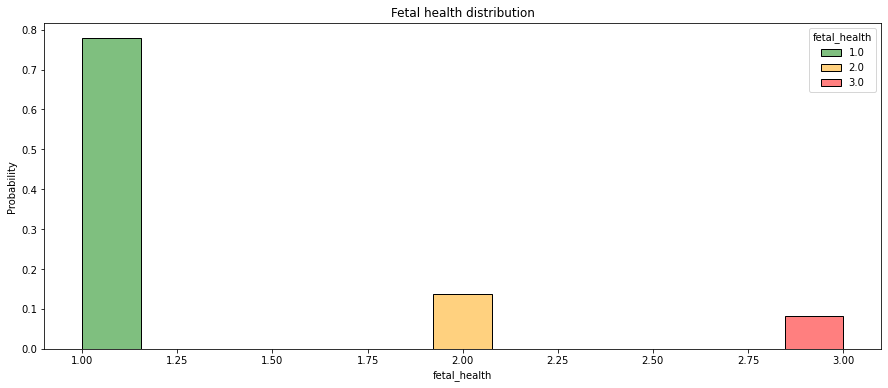

In [6]:
plt.figure(figsize = (15 , 6))
sns.histplot(data = fetal_health ,x = "fetal_health" , hue = "fetal_health" , stat = "probability" ,
             palette = ["green" , "orange" , "red"]).set(title = "Fetal health distribution")

## percentage of high risk class

def percentage(df):
    
    high_risk_count = df.loc[df["fetal_health"] == 3 , "fetal_health"].count()
    total_count = df.fetal_health.count()
    print("high risk class percentage: %f" % (high_risk_count / total_count))
    
percentage(fetal_health)

Around 78% of fetuses belong to the low-risk class, 14% to the medium and 8 % the high one, the target is clearly unbalanced, this could be a problem: the purpose of the model should mostly be to predict when the fetus is in the high-risk class, being this the minor class we need to focus not on the accuracy of the model, but on its precision.
There are techniques to make the classes more balanced, for example:
- creating synthetic samples of the smaller class: **oversampling**
- reducing the number of samples of the dominant class: **undersampling**
- assigning a weight to each class proportionally: **class weight**  

In this analysis the dataset will not be balanced, it will only be used a metric that can efficiently inform about the real classification precision for each class.

let's divide the dataset into the training and test parts:
<br><br>

In [7]:
## features

X = fetal_health.drop(columns = ["fetal_health"])

## target

y = fetal_health["fetal_health"]

## random split with test size equal to 33% of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(1424, 21)
(702, 21)


### 2.1 MISSING VALUES


If there were missing values, there would be three ways to deal with the problem:

1. delete rows with missing values.
2. use some tricks to fill the empty cells, using the mean or the median of the variable.</li>
3. Find the missing values in external sources.

it is better to specify that the second way refers to the mean or the median of the training set, to avoid data leakage, in fact if it is considered the whole dataset, then the model will be trained with values obtained from outside the training set, this will cause a worst performance. 
The concept of data leakage is valid also for outliers detection and features standardization.
<br><br>

In [8]:
fetal_health.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<br>
There are no missing values. 
<br><br>

### 2.2 OUTLIERS DETECTION

For a better performance it is convenient to analyze the single features to find and eventually delete the outliers, these are weird values that behave differently from the others, they are often located far from the interquartile range.<br>
To detect these values is used the isolation forest algorithm, it works finding the anomalies that are far from the rest of the values. The most important parameter is "contamination", this last indicates a proportion to help estimating the number of outliers, it assumes values between 0.0 and 0.5, the dataset is not big, so it is set on 0.1.
<br><br>

In [9]:
## isolation forest to detect outliers

iso = IsolationForest(n_estimators = 100 , contamination = 0.1).fit_predict(X_train)
print(iso)

[1 1 1 ... 1 1 1]


In [10]:
## percentage of outliers

print("percentage of outliers: %f" % (np.count_nonzero(iso == -1)/np.sum(iso) * 100))

percentage of outliers: 12.565905


In [11]:
## deleting -1 values (outliers)

mask = iso != -1
X_train_iso , y_train_iso = X_train[mask] , y_train[mask]

## converting to dataframe

df = pd.DataFrame(data = y_train_iso)

## shapes

print(X_train_iso.shape)
print(y_train_iso.shape)

(1281, 21)
(1281,)


<br>
This method has a problem, by looking at the following graph it can be noticed that the high-risk class is roughly an half of the original, probably this method treated the values related to this class like anomalies.
<br><br>

high risk class percentage: 0.049961


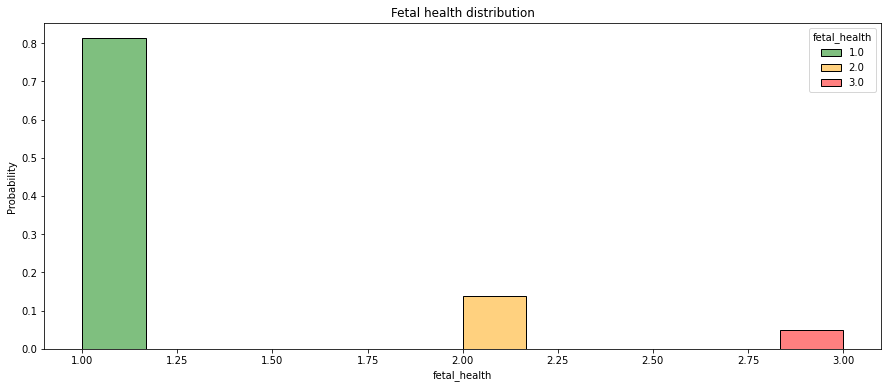

In [12]:
plt.figure(figsize = (15 , 6))

sns.histplot(data = df , x = "fetal_health" , hue = "fetal_health" , stat = "probability" ,
             palette = ["green" , "orange" , "red"]).set(title = "Fetal health distribution")

## percentage of high risk class

percentage(df = df)

<br>
Let's try with another method, the "local outlier factor" that compares a data point to its neighbors.
<br><br>

In [13]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers

mask = yhat != -1
X_train_lof , y_train_lof = X_train[mask] , y_train[mask]

## convert to dataframe

df = pd.DataFrame(y_train_lof)

## percentage of outliers

print("percentage of outliers: %f" % (np.count_nonzero(yhat == -1)/np.sum(yhat) * 100))

print(X_train_lof.shape)
print(y_train_lof.shape)

percentage of outliers: 2.122987
(1395, 21)
(1395,)


high risk class percentage: 0.090323


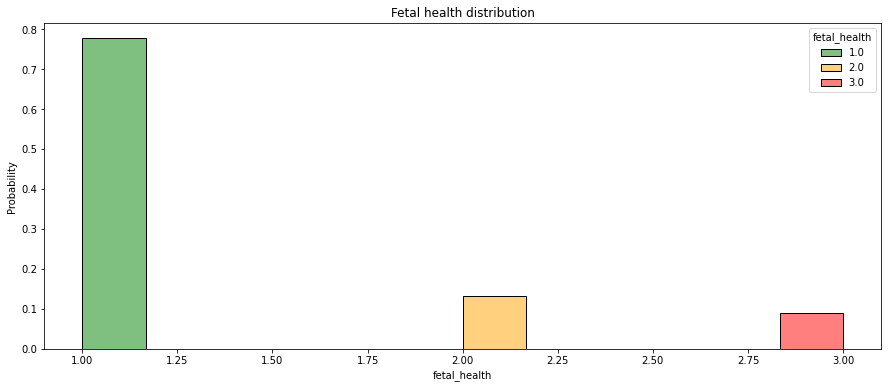

In [14]:
plt.figure(figsize = (15 , 6))

sns.histplot(data = df , x = "fetal_health" , hue = "fetal_health" , stat = "probability" ,
             palette = ["green" , "orange" , "red"]).set(title = "Fetal health distribution")

## percentage of high risk class

percentage(df = df)

This time the proportion remained more or less constant.<br><br>

In [15]:
X_train , y_train = X_train_lof , y_train_lof

### 2.3 COLLINEARITY AND FEATURE SELECTION

For a correct interpretation of the results and to have an idea of the relevance of every variable, before building the model is usually checked the correlation feature vs. feature and feature vs. target.
let's start with a correlation matrix:
<br><br>

<AxesSubplot:>

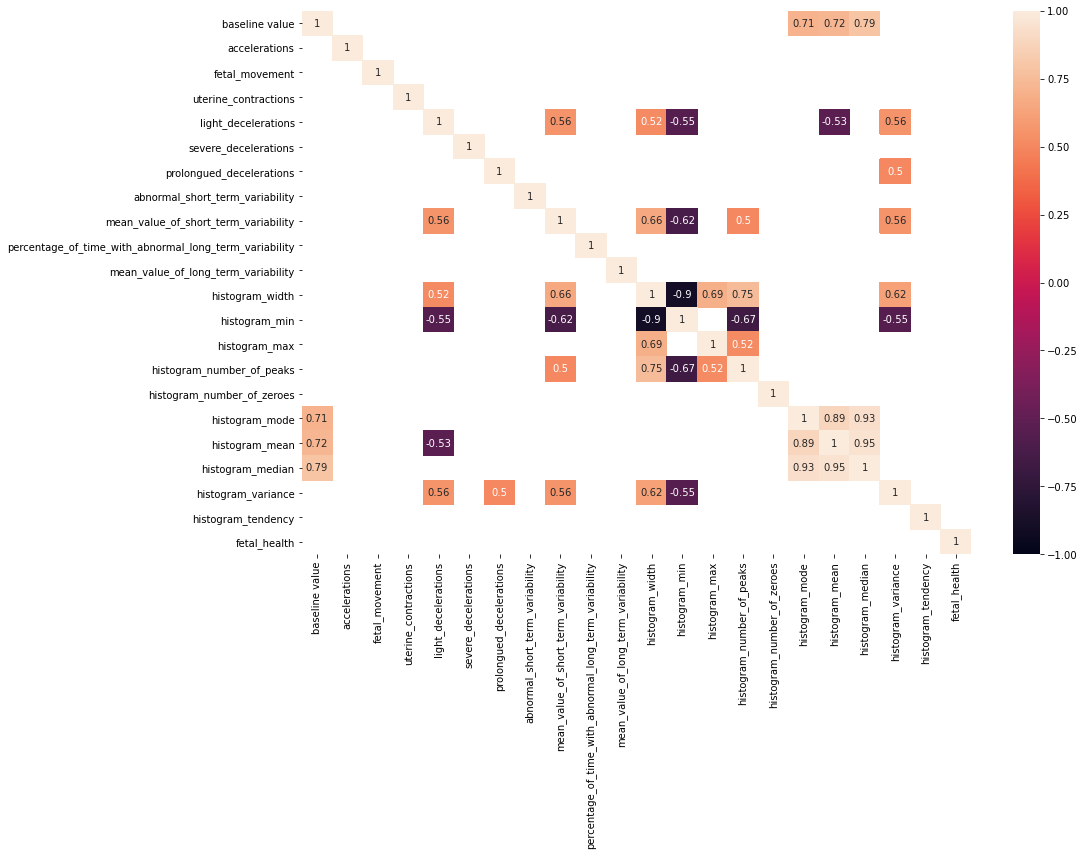

In [16]:
matrix = fetal_health.corr().round(2)

## only relevant correlations

def_corr = matrix[(matrix <= - 0.5) | (matrix >= 0.5)]
plt.figure(figsize = (15 , 10))
sns.heatmap(data = def_corr , vmin = -1 , vmax = 1 , annot = True)

This graph shows only the relatively strong correlations, not a single feature is strongly correlated with the target, but there are relevant relationships between the variables, so it is possible that inside the dataset there is multicollinearity. The vif (variance inflation factor) can be used to find collinear variables, it works regressing every variable against the others.
A vif > 5 means that there is collinearity, when this happens there are two ways to proceed:
- deleting one or more of the collinear variables.
- creating a variable that can contain the collinear ones.


Before this procedure is better to estimate the importance of every feature, to avoid, calculating the vif, to delete important ones.
To do this in this analysis will be used the mutual information first and the ANOVA f-test after.
<br><br>

Text(0.5, 1.0, 'FEATURE IMPORTANCE WITH MUTUAL INFORMATION')

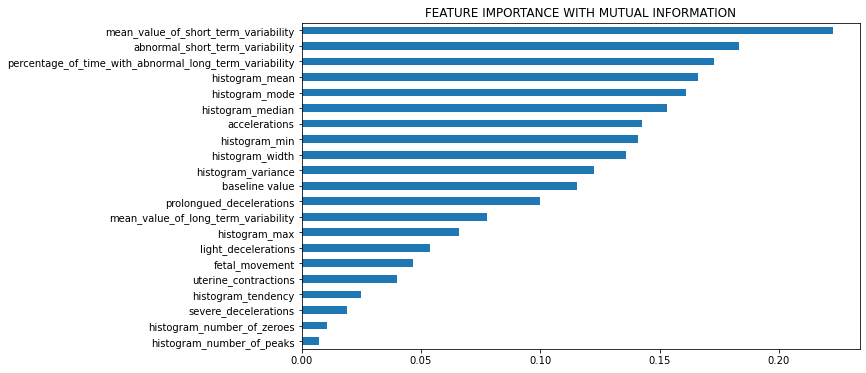

In [17]:
## mutual information

fs = SelectKBest(score_func = mutual_info_classif , k = 'all')

# learning relationship from training data

fs.fit(X_train, y_train)

## converting to series

mutual_info = pd.Series(fs.scores_)

## assigning column names

mutual_info.index = X_train.columns

## horizontal barplot in descending order

mutual_info.sort_values().plot.barh(figsize = (10, 6)).set_title("FEATURE IMPORTANCE WITH MUTUAL INFORMATION")


<br>
Let's try with the other method:
<br><br>

Text(0.5, 1.0, 'FEATURE IMPORTANCE WITH ANOVA F-TEST')

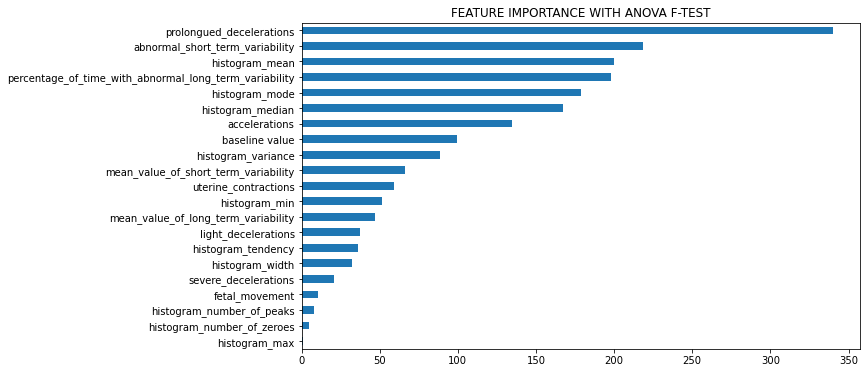

In [18]:
## anova f-test

fs = SelectKBest(score_func = f_classif, k='all')

# learning relationship from training data

fs.fit(X_train, y_train)

## converting to series

fs = pd.Series(fs.scores_)

## assigning column names

fs.index = X_train.columns

## horizontal barplot in descending order

fs.sort_values().plot.barh(figsize = (10 , 6)).set_title("FEATURE IMPORTANCE WITH ANOVA F-TEST")

<br>
While the anova f-test is severe to classify the features, the mutual information has a more homogeneous aspect. Let's select the best 4 features according to anova f-test, the datasets containing them will be used later:
<br><br>

In [19]:
## selecting the best 4 features

X_train_best = X_train.loc[: , ["histogram_mean" , "abnormal_short_term_variability" ,
                                "percentage_of_time_with_abnormal_long_term_variability" , 
                               "prolongued_decelerations"]]

X_test_best = X_test.loc[: , ["histogram_mean" , "abnormal_short_term_variability" ,
                                "percentage_of_time_with_abnormal_long_term_variability" , 
                               "prolongued_decelerations"]]

<br>
Let's proceed with the vif:
<br><br>

In [20]:
## some column return an infinite vif so it's better to ignore the warning

warnings.filterwarnings('ignore')

def vif_calculation(df , features):
    
    vif , tolerance = {} , {}
    
    for feature in features:
                
        ## list of all the features to regress against
        
        X = [f for f in features if f != feature]
        
        ## dividing the feature from all the others
        
        X , y = df[X] , df[feature]
        
        ## fitting the regression and extracting r-squared
        
        r2 = LinearRegression().fit(X , y).score(X , y)
        
        ## calculating vif
        
        tolerance[feature] = 1 - r2
        vif[feature] = 1 / (tolerance[feature])
        
    return(pd.DataFrame({"vif" : vif}))

vif_calculation(df = X_train , features = [column for column in  X_train])

,vif
abnormal_short_term_variability,1.928774
accelerations,2.820396
baseline value,6.770241
fetal_movement,1.161656
histogram_max,inf
histogram_mean,25.813595
histogram_median,34.280927
histogram_min,inf
histogram_mode,12.636712
histogram_number_of_peaks,2.429861


<br>
The first thing to notice is that some variables return a vif = infinite, that's because they are perfectly related to each other, in fact the histogram width contains the range represented by histogram min and max, so this two can be deleted.
<br>
histogram median, mean and mode are related to each other and with "baseline value", but not all of them can be deleted, they could be very useful in the prediction, so let's mantain the mean and delete the number of peaks and zeroes of histogram, they are the less important ones according to both anova f-test and the mutual information.
<br><br>

In [21]:
useless = ["histogram_min" , "histogram_max" , "histogram_mode" , "histogram_median" ,
           "histogram_number_of_peaks" , "histogram_number_of_zeroes"]
vif_calculation(df = X_train , features = [column for column in X_train if column not in useless])

,vif
abnormal_short_term_variability,1.835893
accelerations,2.759813
baseline value,5.982364
fetal_movement,1.148755
histogram_mean,10.621487
histogram_tendency,1.333338
histogram_variance,2.883125
histogram_width,3.175457
light_decelerations,3.413368
mean_value_of_long_term_variability,1.979654


In [22]:
X_train.drop(columns = useless , inplace = True)
X_test.drop(columns = useless , inplace = True)

### 2.4 STANDARDIZATION

Now the features can be standardized, they will have the same standard deviation, this process is important: the variables have different units of measure, this can create distortions during model training.
the standardization of the training and test sets must be done separately to avoid data leakage.
<br><br>

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train_best = scaler.fit_transform(X_train_best)
X_test_best = scaler.fit_transform(X_test_best)

### 2.5 METRICS

The metrics chosen to evaluate the model should consider the classes distribution ratio, so the accuracy is quite useless because, with a class that covers 80% of the total, it would ever return a score of at least 80%. For this problem will be used the following two metrics:
- **confusion matrix:** provides insight on which classes are being predicted correctly and what errors are being made.
- **F-measure (weighted):** help to understand how well the minority classes are predicted, it assumes values between 0 and 1.


### 3 MODELS BUILDING

The models considered are three:
1. Logistic regression
2. Random forest classifier
3. k-nearest neighbors  

Let's proceed in two different ways:

- All the features are considered
- Only the best 4 features are considered

In both cases the first thing to do is a spot check to select the two best performing models, this is done using the cross validation, this last allows to compare the different models, it works separating a part of the training set, called validation set, using this as a test and repeating the process n times, it is taken the best score obtained. The cv method used is the stratified k-fold, effective for unbalanced target.
<br><br>

In [24]:
## models

lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

models = [lr , rf , knn]

## f1 scores with cv

for model in models:
    model.fit(X_train , y_train)
    skf = StratifiedKFold(n_splits = 5)
    print("%s f1 score: %f" % (model , cross_val_score(model , X_train , y_train , scoring = "f1_weighted" , cv = skf  , error_score = "raise").max()))
    model.fit(X_train_best , y_train)
    print("selected features %s f1 score: %f" % (model , cross_val_score(model , X_train_best , y_train , scoring = "f1_weighted" , cv = skf  , error_score = "raise").max()))



LogisticRegression() f1 score: 0.897153
selected features LogisticRegression() f1 score: 0.865771
RandomForestClassifier() f1 score: 0.959401
selected features RandomForestClassifier() f1 score: 0.948189
KNeighborsClassifier() f1 score: 0.918331
selected features KNeighborsClassifier() f1 score: 0.931653


<br>
The two best models are random forest and k-nearest neighbors. Interesting is the fact that with knn the feature selection improved the result, maybe due to the reduction of overfitting.
<br><br>

### 3.1 HYPERPARAMETERS TUNING

Next step is to choose the best hyperparameter values, this time the cross validation works returning the scores of the models using different hyperparameters in a range. The method used is GridSearch with built in cross-validation, it works using the specified hyperparameter values, looking through all the combinations for the best performance. The hperparameters considered are the maximum depth of trees in random forest and the number of neighbors in knn.
<br><br>

In [25]:
## gridsearchcv random forest

rf_params = {"max_depth" : np.arange(1 , 32)}
gdrf = GridSearchCV(rf , rf_params , scoring = "f1_weighted" , cv = skf)
gdrf.fit(X_train , y_train)

print("the best max depth is: %s" % gdrf.best_params_)
print("the best score is: %f" % gdrf.best_score_)

## extracting the best value

for key , value in gdrf.best_params_.items():
    best_depth = value

the best max depth is: {'max_depth': 27}
the best score is: 0.937566


In [26]:
## with selected features

gdrf.fit(X_train_best , y_train)

print("the best max depth is: %s" % gdrf.best_params_)
print("the best score is: %f" % gdrf.best_score_)

the best max depth is: {'max_depth': 7}
the best score is: 0.919041


In [27]:
## gridsearchcv knn

knn_params = {"n_neighbors" : np.arange(1 , 10)}
gdknn = GridSearchCV(knn , knn_params , scoring = "f1_weighted" , cv = skf)
gdknn.fit(X_train , y_train)

print("the best number of neighbors is: %s" % gdknn.best_params_)
print("the best score is: %f" % gdknn.best_score_)

the best number of neighbors is: {'n_neighbors': 3}
the best score is: 0.898591


In [28]:
## with selected features

gdknn.fit(X_train_best , y_train)

print("the best number of neighbors is: %s" % gdknn.best_params_)
print("the best score is: %f" % gdknn.best_score_)

for key , value in gdknn.best_params_.items():
    best_k = value

the best number of neighbors is: {'n_neighbors': 5}
the best score is: 0.905033


### 3.2 PREDICTION


The last step is to use the models using the test set:
<br><br>

In [29]:
## random forest prediction with all features

rf = RandomForestClassifier(max_depth = best_depth)
rf.fit(X_train , y_train)
prediction = rf.predict(X_test)

f1_score(y_test , prediction , average = "weighted")

0.9265263668742434

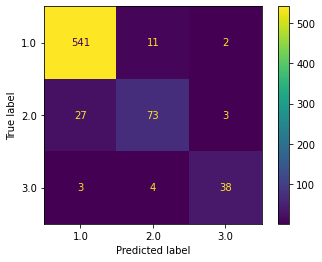

In [30]:
cm = confusion_matrix(y_test , prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = rf.classes_)
display.plot()

<br>
The prediction registered a score of 92.5%. The graph above is a confusion matrix, it is a little difficult to intepret, the important thing to know is that on 45 high risk fetuses, 37 were classified well, 5 in the medium and 3 in the low risk classes (82% classified well). Despite the unbalance problem, the result is discrete.
<br><br>

In [31]:
## knn prediction with selected features

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train_best , y_train)
prediction = knn.predict(X_test_best)

f1_score(y_test , prediction , average = "weighted")

0.8993326171608667

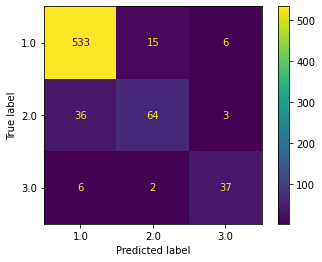

In [32]:
cm = confusion_matrix(y_test , prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = rf.classes_)
display.plot()

<br>
With knn the result is a little worse, 37 high risk fetuses were classified well, but 2 in the medium and 6 in the low risk classes, the difference is that in the previous prediction the largest part of misclassified fetuses were in the medium category, so closer to the high risk one.
<br><br>

### 4 CONCLUSION

The results are overall good. Being the dataset unbalanced, the largest class is predicted better, but the other classes registered a good score.
the best model is random forest, it performs better with all the features (except the collinear ones), anyway its score is not so much better than knn, this last works better with selected features.  
This analysis can be summarized in a few unordered steps:
1. Prepare the data (exploration, cleaning).
2. Transform the dataset (outliers removal, collinearity detection, standardization).
3. Select the features.
4. Choose the metrics.
5. Build, evaluate and compare the models.